In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


# Feature Importance
*  techniques that assign a score to input features based on how useful they are at predicting a target variable
* There are many types and sources of feature importance scores, although popular examples include statistical correlation scores, coefficients calculated as part of linear models, decision trees, and permutation importance scores
* Feature importance scores play an important role in a predictive modeling project, including providing insight into the data, insight into the model
* Feature importance refers to a class of techniques for assigning scores to input features to a predictive model that indicates the relative importance of each feature when making a prediction
* Feature importance scores can be calculated for problems that involve predicting a numerical value, called regression, and those problems that involve predicting a class label, called classification.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import plotting

#plotly 
import plotly.offline as py
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.express as px

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix,classification_report,precision_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf

sns.set(style="whitegrid")

In [3]:
df=pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df=df.drop('Unnamed: 32', axis=1)


In [5]:
from scipy import stats


# Joint PLot with Pearson Coefficent

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



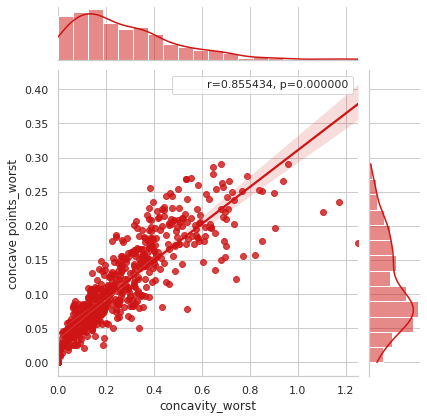

In [6]:
r, p=stats.pearsonr(df.loc[:,'concavity_worst'], df.loc[:,'concave points_worst'])
graph=sns.jointplot(df.loc[:,'concavity_worst'], df.loc[:,'concave points_worst'], kind="reg", color="#ce1414",)
phantom, =graph.ax_joint.plot([],[], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
plt.show()

In [7]:
diagnosis={'M':1, 'B':0}
df['diagnosis']=[diagnosis[x] for x in df['diagnosis']]

In [8]:
col=['id', 'diagnosis']
X=df.drop(col, axis=1)
y=df['diagnosis']
X_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)

In [9]:
X.shape, y.shape

((569, 30), (569,))

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [11]:
y.dtype

dtype('int64')

# Logistic Regresion

In [12]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [13]:
X_train.shape, y_train.shape

((398, 30), (398,))

In [14]:
lr=LogisticRegression(solver="liblinear")
lr.fit(X, y)


LogisticRegression(solver='liblinear')

In [15]:
col=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

Feature: 0, Score: -2.08032
Feature: 1, Score: -0.12344
Feature: 2, Score: 0.04981
Feature: 3, Score: 0.00388
Feature: 4, Score: 0.15143
Feature: 5, Score: 0.39548
Feature: 6, Score: 0.63582
Feature: 7, Score: 0.33548
Feature: 8, Score: 0.22244
Feature: 9, Score: 0.02600
Feature: 10, Score: 0.02774
Feature: 11, Score: -1.22877
Feature: 12, Score: 0.00773
Feature: 13, Score: 0.09366
Feature: 14, Score: 0.01659
Feature: 15, Score: -0.00643
Feature: 16, Score: 0.04681
Feature: 17, Score: 0.03959
Feature: 18, Score: 0.04160
Feature: 19, Score: -0.00616
Feature: 20, Score: -1.22801
Feature: 21, Score: 0.34557
Feature: 22, Score: 0.12733
Feature: 23, Score: 0.02376
Feature: 24, Score: 0.28051
Feature: 25, Score: 1.10451
Feature: 26, Score: 1.55180
Feature: 27, Score: 0.64575
Feature: 28, Score: 0.67936
Feature: 29, Score: 0.11120


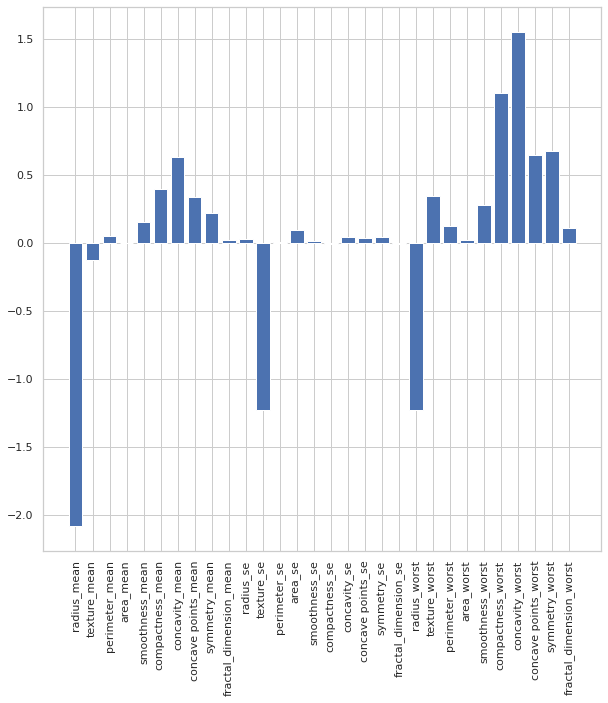

In [16]:
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10,10))
plt.bar(X.columns, importance)
plt.xticks(rotation=90)
plt.show()

# Feature imporatnce after Standarization

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [18]:
lr=LogisticRegression(solver="liblinear")
lr.fit(X, y)

LogisticRegression(solver='liblinear')

Feature: 0, Score: 0.35372
Feature: 1, Score: 0.38509
Feature: 2, Score: 0.34237
Feature: 3, Score: 0.44138
Feature: 4, Score: 0.15524
Feature: 5, Score: -0.56816
Feature: 6, Score: 0.86852
Feature: 7, Score: 0.96811
Feature: 8, Score: -0.07328
Feature: 9, Score: -0.31122
Feature: 10, Score: 1.29527
Feature: 11, Score: -0.26995
Feature: 12, Score: 0.66624
Feature: 13, Score: 1.02955
Feature: 14, Score: 0.28127
Feature: 15, Score: -0.74242
Feature: 16, Score: -0.11352
Feature: 17, Score: 0.32007
Feature: 18, Score: -0.28983
Feature: 19, Score: -0.67153
Feature: 20, Score: 1.03049
Feature: 21, Score: 1.31319
Feature: 22, Score: 0.82564
Feature: 23, Score: 1.02916
Feature: 24, Score: 0.67185
Feature: 25, Score: -0.04896
Feature: 26, Score: 0.87162
Feature: 27, Score: 0.91132
Feature: 28, Score: 0.88395
Feature: 29, Score: 0.48355


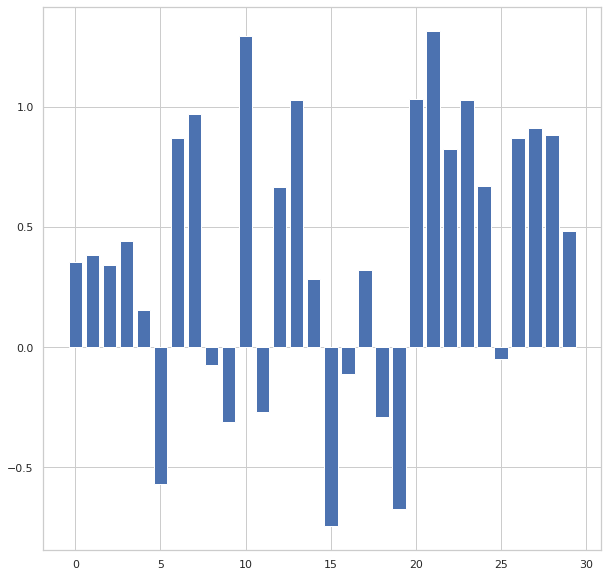

In [19]:
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10,10))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Conclusion
* Standarization affect the features importance of the dataset
* As in above graph we can see that there wwre few features whose values were either too negative or positive. Rest of the features had almost 0
* After standarization we can see that a lot of the features wholse coefficeint values are much better. 
* Here negative values indicate that it tries to push the model towards the negative side
* Same case with the positive value which tends to push the model in positive side.

# Decision Tree

In [20]:
col=['id', 'diagnosis']
X=df.drop(col, axis=1)
y=df['diagnosis']
X_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)

In [21]:
from sklearn.tree import DecisionTreeClassifier


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.01128
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00702
Feature: 5, Score: 0.00583
Feature: 6, Score: 0.00564
Feature: 7, Score: 0.04061
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.01421
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00205
Feature: 14, Score: 0.00100
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00644
Feature: 20, Score: 0.69559
Feature: 21, Score: 0.07728
Feature: 22, Score: 0.00564
Feature: 23, Score: 0.01109
Feature: 24, Score: 0.00739
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00184
Feature: 27, Score: 0.10710
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000


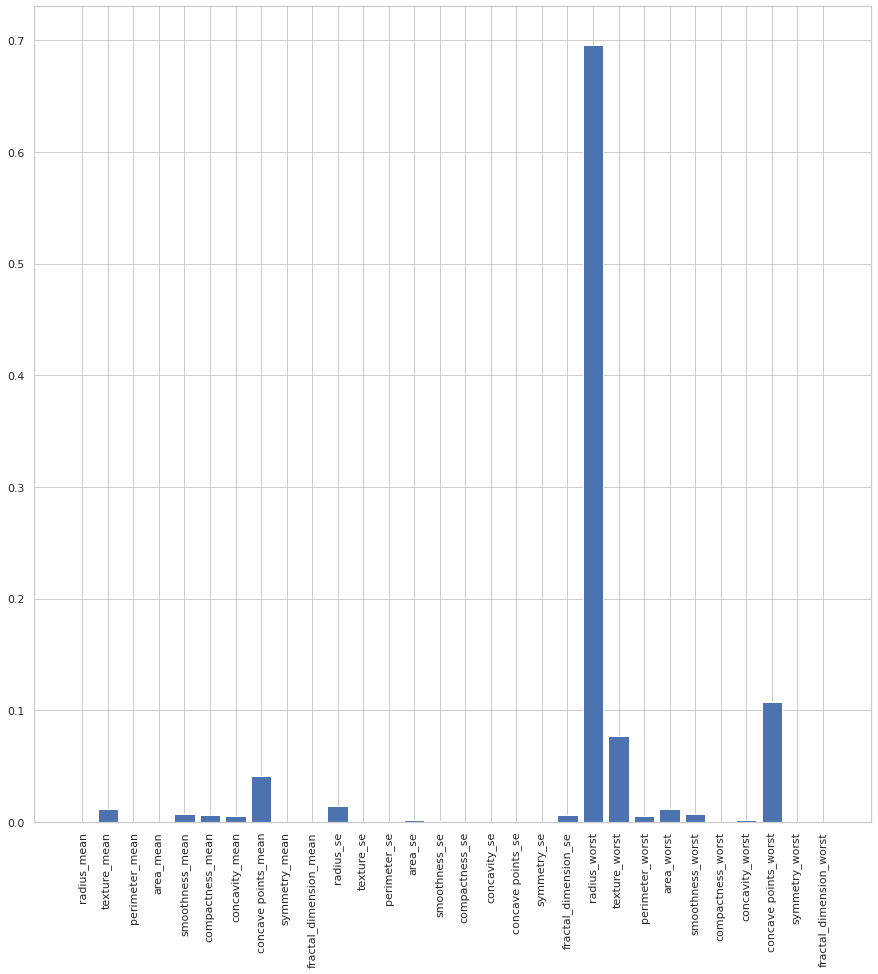

In [22]:
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(15,15))
plt.bar(X.columns, importance)
plt.xticks(rotation=90)

plt.show()

# Conclusion
* The most important features are "radius_worst"
* The lkist of the important featuires are --Radius_worst, texture_worst, concave point worst, texture mean, concavity features, etc
* Those features wholse value is almost equal to 0 , are least important features. 
* Least features can be removed form the dataset and the dataset will be used for prediction. 

# Feature importance after the standarization 

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00564
Feature: 7, Score: 0.01441
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00205
Feature: 14, Score: 0.00100
Feature: 15, Score: 0.00689
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00732
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.69559
Feature: 21, Score: 0.09501
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.01109
Feature: 24, Score: 0.01440
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00767
Feature: 27, Score: 0.13894
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000


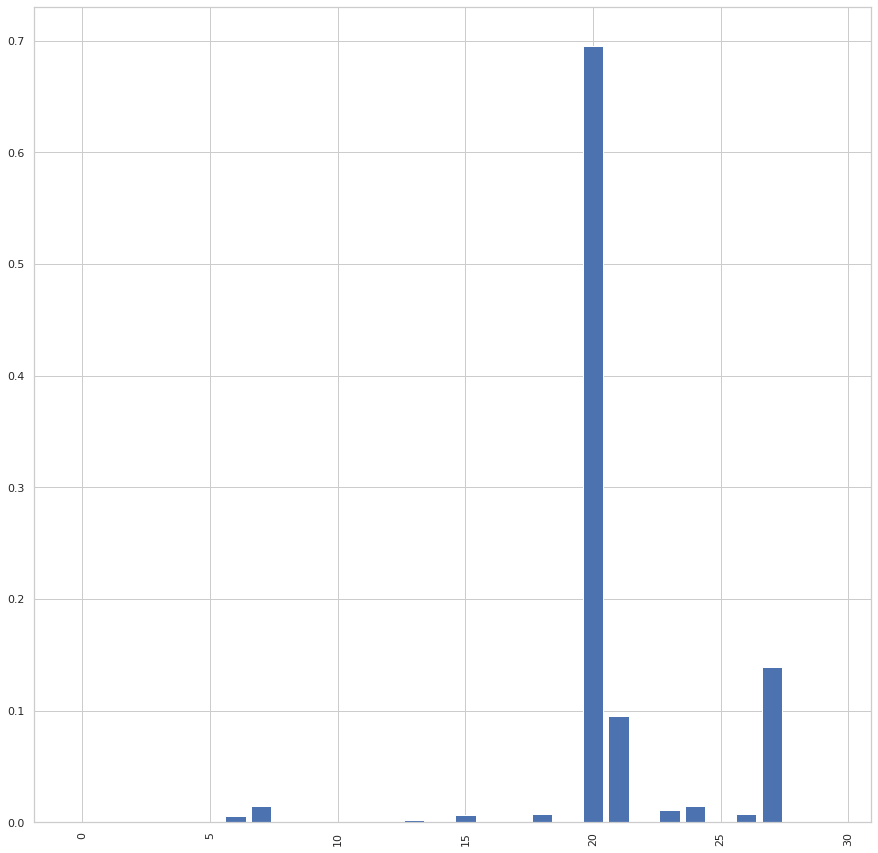

In [24]:
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(15,15))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(rotation=90)

plt.show()

# Conlusion
* Since we are getting same number of the important features.


# Random Forest

In [25]:
col=['id', 'diagnosis']
X=df.drop(col, axis=1)
y=df['diagnosis']
X_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)

In [26]:
from sklearn.ensemble import RandomForestClassifier


Feature: 0, Score: 0.01862
Feature: 1, Score: 0.01097
Feature: 2, Score: 0.08621
Feature: 3, Score: 0.03810
Feature: 4, Score: 0.00668
Feature: 5, Score: 0.01146
Feature: 6, Score: 0.03650
Feature: 7, Score: 0.10385
Feature: 8, Score: 0.00369
Feature: 9, Score: 0.00370
Feature: 10, Score: 0.01074
Feature: 11, Score: 0.00549
Feature: 12, Score: 0.02212
Feature: 13, Score: 0.04113
Feature: 14, Score: 0.00418
Feature: 15, Score: 0.00544
Feature: 16, Score: 0.00508
Feature: 17, Score: 0.00374
Feature: 18, Score: 0.00397
Feature: 19, Score: 0.00434
Feature: 20, Score: 0.11029
Feature: 21, Score: 0.01667
Feature: 22, Score: 0.13702
Feature: 23, Score: 0.11706
Feature: 24, Score: 0.01275
Feature: 25, Score: 0.01631
Feature: 26, Score: 0.03893
Feature: 27, Score: 0.10627
Feature: 28, Score: 0.01134
Feature: 29, Score: 0.00733


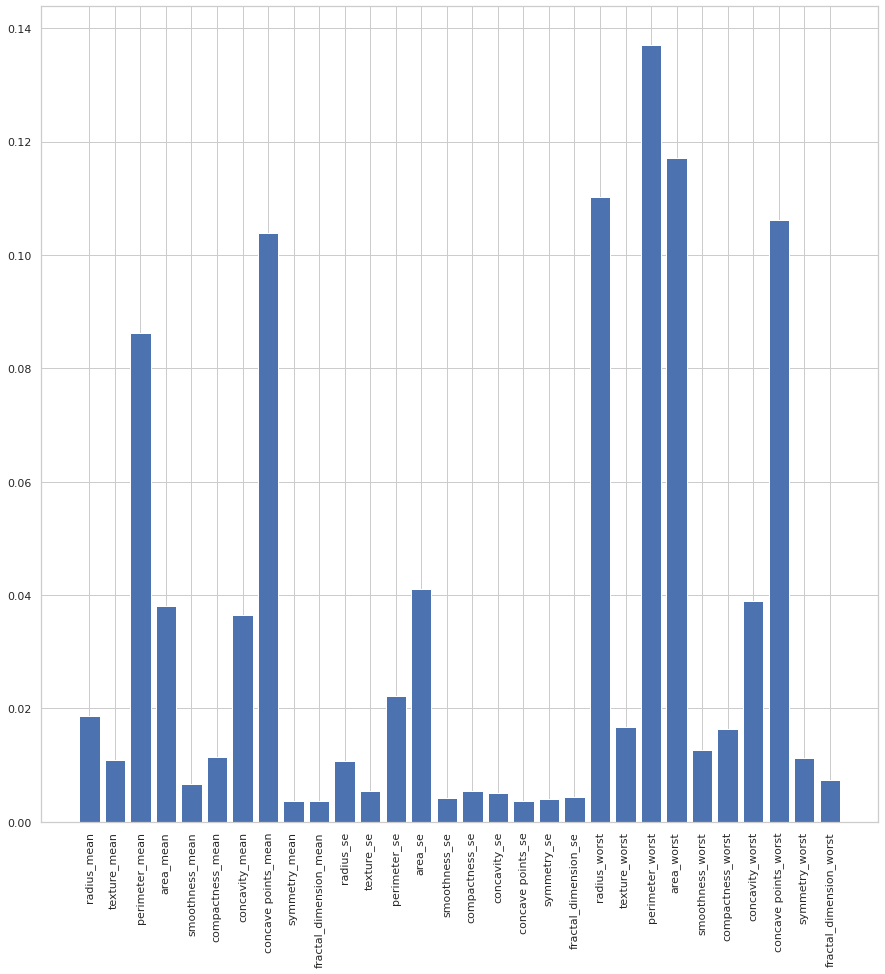

In [27]:
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(15,15))
plt.bar(X.columns, importance)
plt.xticks(rotation=90)

plt.show()

# Conclusion
* The most important features is "Concave Point Wrost"
* The list of the most imporatnt feature that we obtained using Random Forest Classifier are----Perimetr Wrost, Concave point worst, radius worst, concave point mean, area worst, texture mean etc.
* SInce we can see that there are llarge number of important features ae available
* Those feature which have least value can be removed from the dataset. 

# Feature importance before Standarization

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [29]:
model=RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

Feature: 0, Score: 0.04089
Feature: 1, Score: 0.01392
Feature: 2, Score: 0.07033
Feature: 3, Score: 0.02773
Feature: 4, Score: 0.00517
Feature: 5, Score: 0.00639
Feature: 6, Score: 0.07255
Feature: 7, Score: 0.10066
Feature: 8, Score: 0.00423
Feature: 9, Score: 0.00438
Feature: 10, Score: 0.00926
Feature: 11, Score: 0.00357
Feature: 12, Score: 0.01759
Feature: 13, Score: 0.04063
Feature: 14, Score: 0.00420
Feature: 15, Score: 0.00451
Feature: 16, Score: 0.00351
Feature: 17, Score: 0.00651
Feature: 18, Score: 0.00359
Feature: 19, Score: 0.00620
Feature: 20, Score: 0.10084
Feature: 21, Score: 0.02725
Feature: 22, Score: 0.13375
Feature: 23, Score: 0.11345
Feature: 24, Score: 0.01669
Feature: 25, Score: 0.01257
Feature: 26, Score: 0.03234
Feature: 27, Score: 0.09768
Feature: 28, Score: 0.01434
Feature: 29, Score: 0.00527


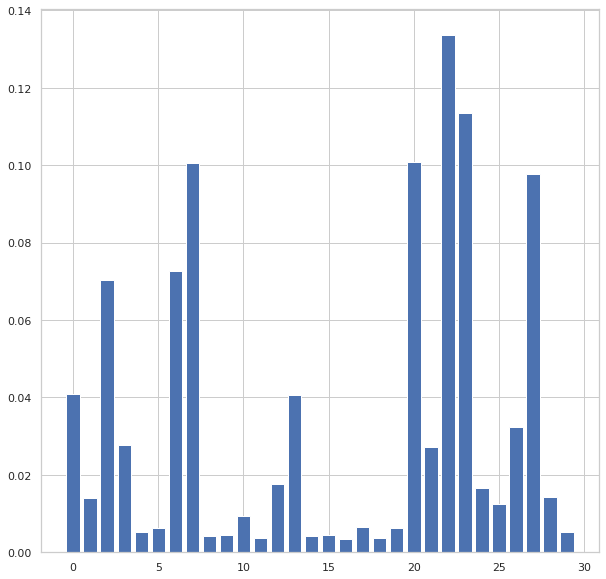

In [30]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10,10))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Conclusion
* It is same as done above 
* Without and with standarization has less impact or almost no impact on feature importance

# XGBoost Feature Importance

In [31]:
col=['id', 'diagnosis']
X=df.drop(col, axis=1)
y=df['diagnosis']
X_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)

In [32]:
from xgboost import XGBClassifier


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[07:31:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature: 0, Score: 0.00911
Feature: 1, Score: 0.01942
Feature: 2, Score: 0.00544
Feature: 3, Score: 0.01670
Feature: 4, Score: 0.00439
Feature: 5, Score: 0.00325
Feature: 6, Score: 0.02007
Feature: 7, Score: 0.05969
Feature: 8, Score: 0.00062
Feature: 9, Score: 0.00524
Feature: 10, Score: 0.01088
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00520
Feature: 14, Score: 0.00669
Feature: 15, Score: 0.00252
Feature: 16, Score: 0.00563
Feature: 17, Score: 0.00745
Feature: 18, Score: 0.00119
Feature: 19, Score: 0.00393
Feature: 20, Score: 0.51029
Feature: 21, Score: 0.01357
Feature: 22, Score: 0.16236
Feature: 23, Score: 0.02496
Feature: 24, Score: 0.00231
Feature: 25, Score: 0.00930
Feature: 26, Score: 0.01318
Fe

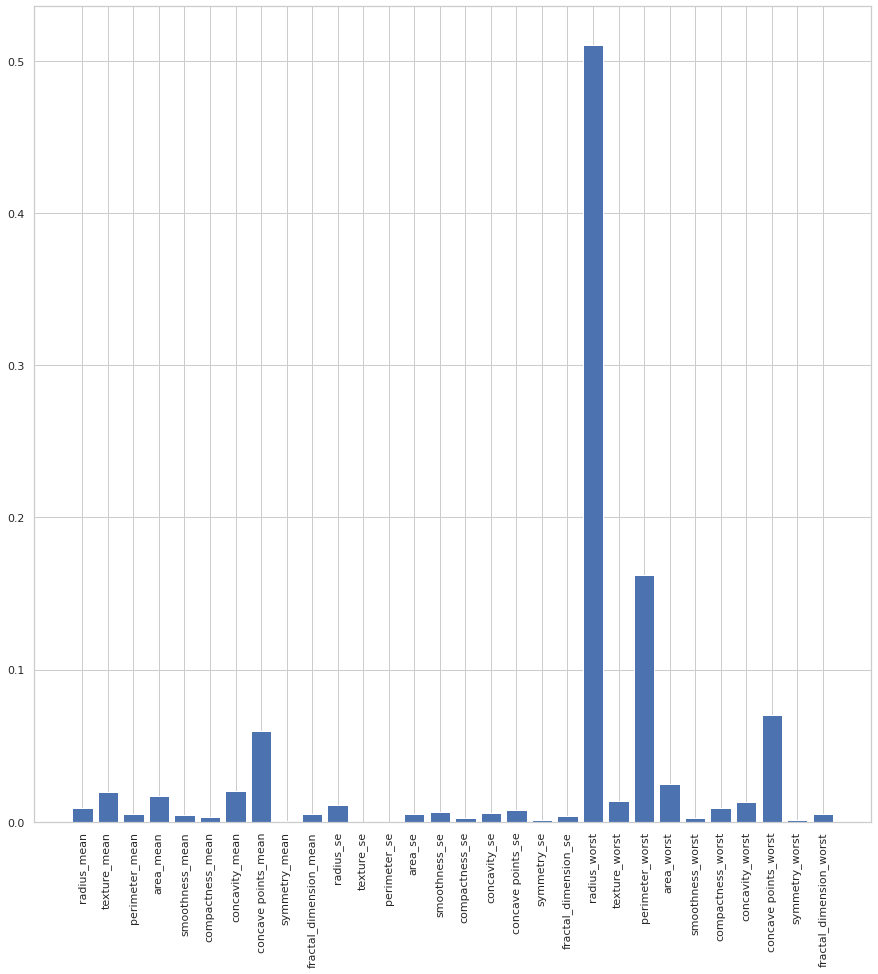

In [33]:
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(15,15))
plt.bar(X.columns, importance)
plt.xticks(rotation=90)

plt.show()

# Classification
* The most important features is Radius Worst
* The number of important features decreaseas.
* As we can see that Perimeter Worst is 2nd important features.

# Permutation Feature Importance
* technique for calculating relative importance scores that is independent of the model used.
* First, a model is fit on the dataset, such as a model that does not support native feature importance scores. 
* This approach can be used for regression or classification and requires that a performance metric be chosen as the basis of the importance score, such as the mean squared error for regression and accuracy for classification.


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

In [35]:
col=['id', 'diagnosis']
X=df.drop(col, axis=1)
y=df['diagnosis']
X_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00070
Feature: 3, Score: 0.14130
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00105
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00176
Feature: 22, Score: 0.00070
Feature: 23, Score: 0.39895
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000


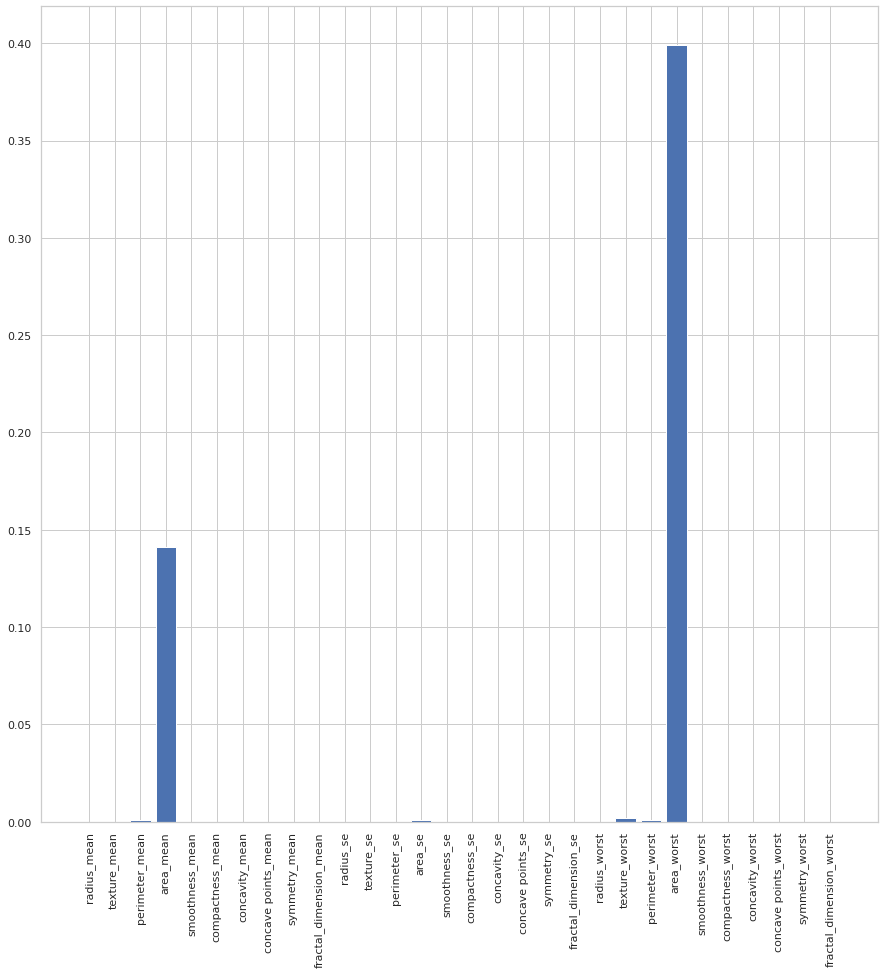

In [36]:
model = KNeighborsClassifier()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
for i,v in enumerate(importance):
    print('Feature: %d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(15,15))
plt.bar(X.columns, importance)
plt.xticks(rotation=90)

plt.show()

# Conclusion
* The most imprtant features is Area worst
* The 2nd most important feature is Area Mean
* as we can see that there is only 2 features which is important